In [113]:
%autoreload 2
from plasmapy import simulation
import astropy.units as u
import numpy as np

In [114]:
import xarray

In [115]:
from plasmapy.classes.sources.interparticle import InterParticleForces

In [116]:
eq_distance = 0.1
forces = {key: InterParticleForces(key, 100, eq_distance, 1, 1e8, 7) for key in ('python', 'njit', 'njit_parallel')}

from collections import namedtuple
CustomParticle = namedtuple('custom_particle', ['mass', 'charge'])
particle = CustomParticle(mass=1 * u.dimensionless_unscaled, charge=1 * u.dimensionless_unscaled)

L = 1 * u.m
N = 1
x = u.Quantity([[0.1, 0.1, 0.5]],  u.m)
v = u.Quantity([[-1000, 1, 0]], u.m / u.s)

In [130]:
solutions = {engine: simulation.ParticleTracker(forces[engine], x, v, particle).run(2e-2 * u.s, dt = 1e-5 * u.s, snapshot_steps = 1000) for engine in ['njit']}

In [131]:
solutions['njit']

<xarray.Dataset>
Dimensions:           (dimension: 3, particle: 1, time: 1001)
Coordinates:
  * time              (time) float64 0.0 3e-05 5e-05 ... 0.01997 0.01999 0.02001
  * particle          (particle) int64 0
  * dimension         (dimension) <U1 'x' 'y' 'z'
Data variables:
    position          (time, particle, dimension) float64 0.1 0.1 ... 0.12 0.5
    velocity          (time, particle, dimension) float64 -1e+03 1.0 ... 1.0 0.0
    B                 (time, particle, dimension) float64 0.0 0.0 ... 0.0 0.0
    E                 (time, particle, dimension) float64 0.0 0.0 ... 0.0 0.0
    timestep          (time) float64 1e-05 1e-05 1e-05 ... 1e-05 1e-05 1e-05
    kinetic_energy    (time, particle) float64 5e+05 5e+05 5e+05 ... 5e+05 5e+05
    potential_energy  (time, particle) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    particle:  custom_particle(mass=<Quantity 1.>, charge=<Quantity 1.>)

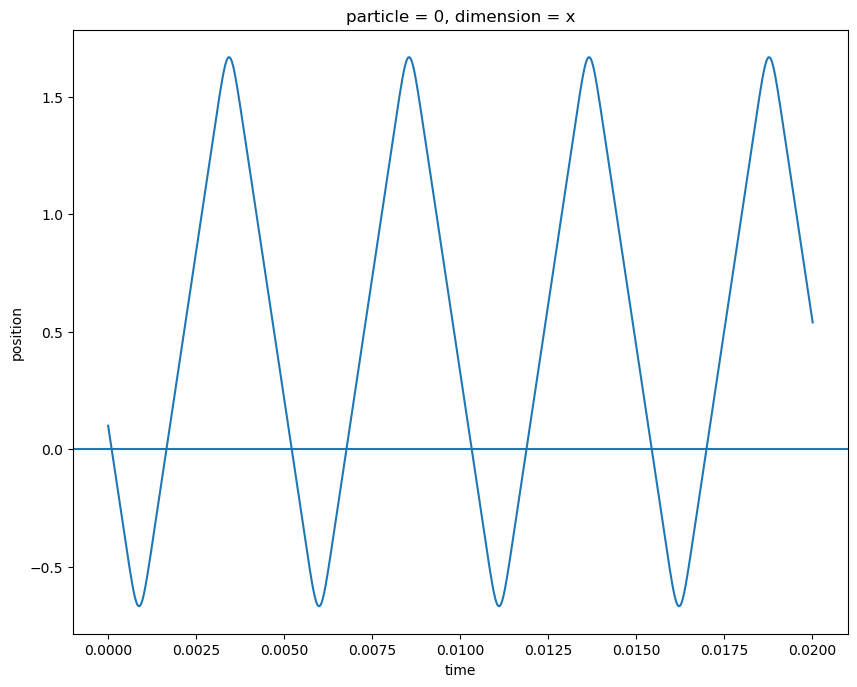

In [132]:
solutions['njit'].position.sel(dimension='x', particle=0).plot.line()
import matplotlib.pyplot as plt
plt.axhline(0)

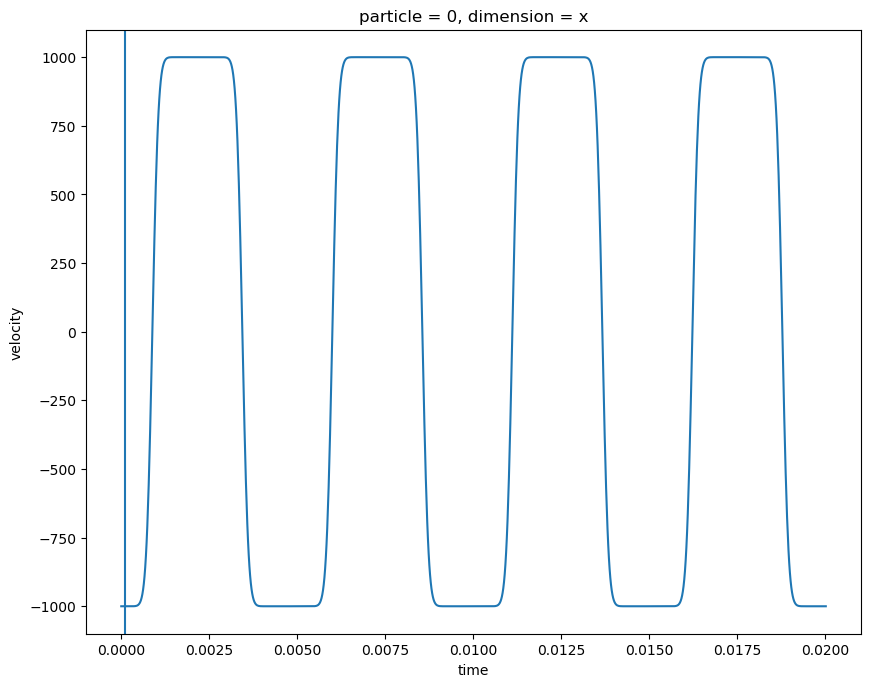

In [133]:
solutions['njit'].velocity.sel(dimension='x', particle=0).plot.line()
import matplotlib.pyplot as plt
plt.axvline(1e-4)

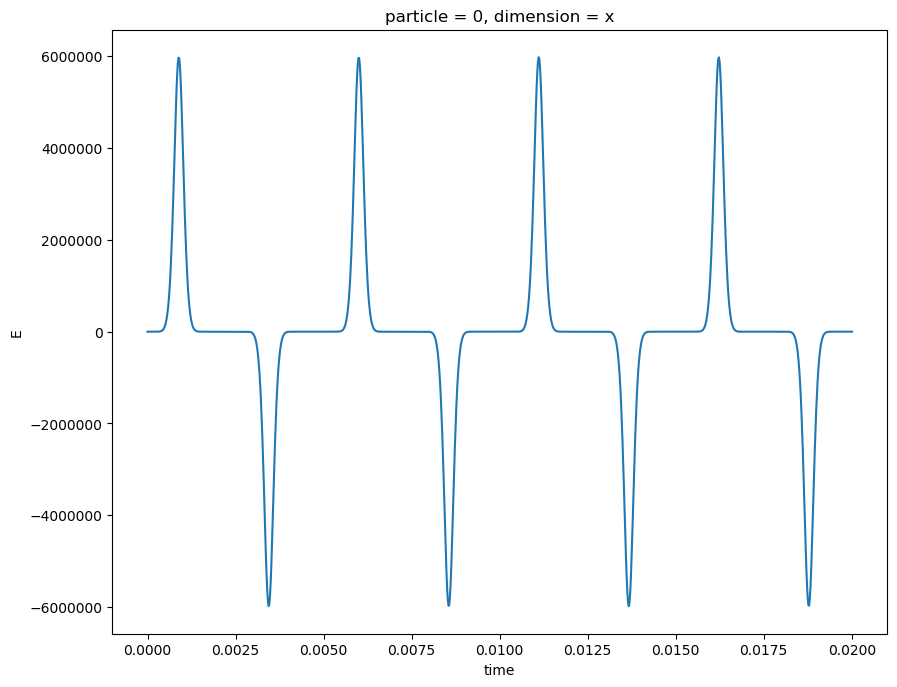

In [134]:
solutions['njit'].E.sel(dimension='x', particle=0).plot.line()

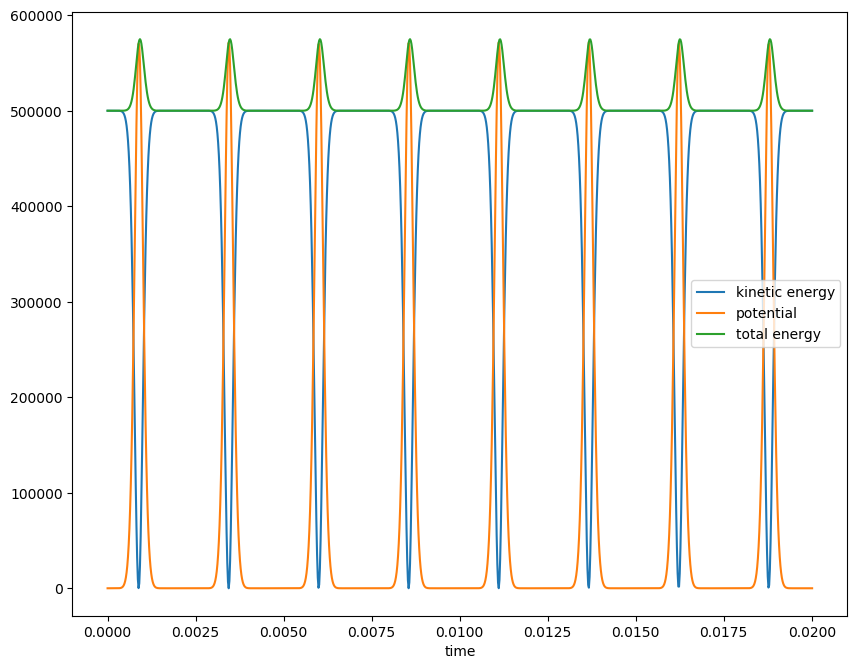

In [150]:
solutions['njit'].kinetic_energy.sum(dim='particle').plot.line(label="kinetic energy")
solutions['njit'].potential_energy.sum(dim='particle').plot.line(label="potential")
(solutions['njit'].potential_energy + solutions['njit'].kinetic_energy).sum(dim='particle').plot.line(label="total energy")
plt.legend()
plt.savefig("energia.png")

In [8]:
solution.particletracker.plot_trajectories()

NameError: name 'solution' is not defined

In [ ]:
solution.particletracker.plot_time_trajectories('xy')

In [ ]:
solution = solutions['njit']
import pyvista
fig = pyvista.PlotterITK()
for particle in range(N):
    solution.particletracker.visualize(fig, particle=particle, stride=1);
fig.add_mesh(pyvista.Cube(bounds=(0, L.si.value, 0, L.si.value, 0, L.si.value)), opacity=0.1)
fig.show()